In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load data
red = pd.read_csv("../data/wine+quality/winequality-red.csv", sep=';')
white = pd.read_csv("../data/wine+quality/winequality-white.csv", sep=';')

# Add wine type
red['type'] = 'red'
white['type'] = 'white'

# Combine datasets
df = pd.concat([red, white], ignore_index=True)

# One-hot encode 'type'
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Split features and target
X = df.drop(['quality'], axis=1)
y = df['quality']

# Optional: encode y if needed (if using classification with integers)
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # e.g., wine scores 3–9 → 0–6

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [4]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [5]:
y_pred = rf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_.astype(str)))

Accuracy: 0.6961538461538461
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.57      0.09      0.16        43
           5       0.74      0.71      0.73       428
           6       0.67      0.80      0.73       567
           7       0.69      0.60      0.64       216
           8       0.94      0.38      0.55        39
           9       0.00      0.00      0.00         1

    accuracy                           0.70      1300
   macro avg       0.51      0.37      0.40      1300
weighted avg       0.70      0.70      0.68      1300



/opt/anaconda3/envs/sago/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/sago/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/sago/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


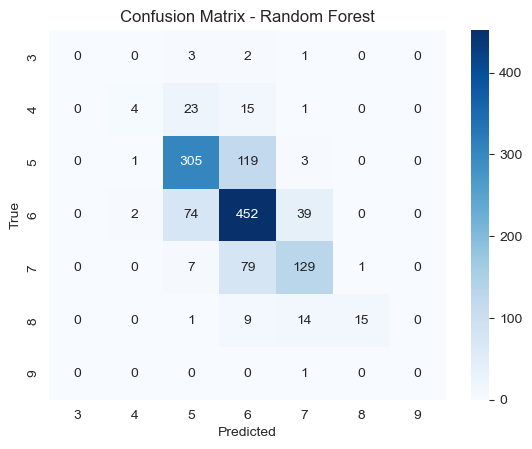

In [6]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Random Forest")
plt.show()

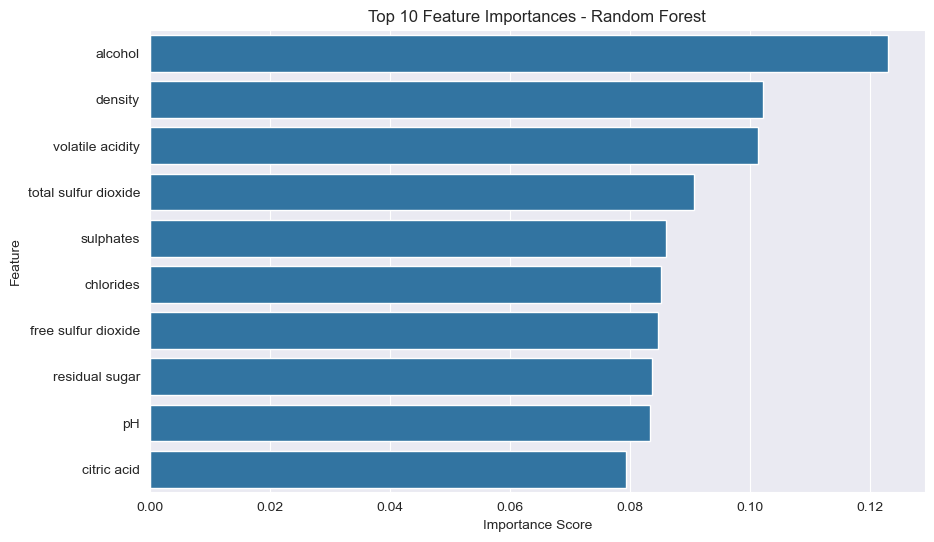

In [7]:
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices[:10]], y=features[indices[:10]])
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()